# Handling Imbalanced Dataset via 2 techniques

## Why to handle Imbalanced Dataset?

Problem :
Let's imagine we have records of 1000 bank customers. We have collected and saw how many bank customers close their account and how many did not yet.

Suppose, we have data implying 900 bank customers who close their account and 100 bank customers who did not.

Such dataset is call imbalanced dataset where the outcomes are not evenly distributed.

Now if we train our machine learning model with this dataset, it will take biased decision. 

Solution :
Lets try to bring the ratio to 50% and 50% or 60:40% so that our ML model will give more matured output.

Hence, lets explore two different techniques to handle such imbalanced dataset.

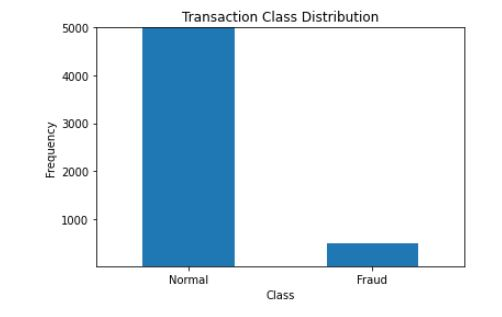

Following are 2 techniques :
1. Under Sampling or Down Sampling
2. Over Sampling or Up Sampling

## Acknowledgements 

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project

## Contents 

1. Import Libraries and Dataset
2. Exploratory Data Analysis
3. Apply Under Sampling to handle
4. Apply Over Sampling to handle
5. Conclusion : Which ones works better?

## 1. Import Libraries and Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('creditcard.csv') 
#File is around 150 MB. So please download it from Kaggle site.( https://www.kaggle.com/mlg-ulb/creditcardfraud)
dataset.head()

In [ ]:
dataset.info()

In [ ]:
dataset.describe()

In [ ]:
dataset.shape # 31 features and 2 lakhs 84 thousand records

## 2. Exploratory Data Analysis (EDA)

We do EDA to understand what data are we dealing with. What independnt features are vital and how they effect our Dependent Feature?

In [ ]:
#Check the null values in dataset
dataset.isnull().values.any()
#dataset.isnull().sum()

In [ ]:
#Lets explore the dependent feature ( Class ) and independent features 
columns = dataset.columns.tolist()
columns #all column name in this list

In [ ]:
#Lets filter the columns except CLASS
columns = [c for c in columns if c not in ["Class"]]
columns

In [ ]:
target = "Class"
target

In [ ]:
#Lets see the heatmap using seaborn
corrmat = dataset.corr()
top_corr_mat = corrmat.index
plt.figure(figsize=[20,20])
g = sns.heatmap(dataset[top_corr_mat],annot=True,cmap='RdYlGn') #It might take little time as there are 31 features

In [ ]:
#Define our X and y
X = dataset[columns]
y = dataset[target]

In [ ]:
X

In [ ]:
y

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
#Lets see the count distribution of CLASS ( Dependent Variable )
count_classes = pd.value_counts(dataset['Class'],sort=True)
count_classes

Hence , we can say this is our IMBALANCED dataset.

In [ ]:
#Lets visualize this count
count_classes.plot(kind='bar',rot=0)

#Customize
plt.title("Transaction Class Distribution")
plt.xticks(range(2),["Normal","Fraud"])
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.ylim(10,5000)
plt.show()

In [ ]:
#Get the Fraud and Normal dataset
fraud = dataset[dataset['Class']==1]
normal = dataset[dataset['Class']==0]

In [ ]:
print("Fraud Count : "+str(fraud.shape[0]))
print("Normal Count : "+str(normal.shape[0]))

## 3. Apply Under Sampling to handle 

In under sampling, we will downscale normal count to fraud count. i.e. After this method, the count will look like this :
X count : 492 Fraud + 492 Normal : 984
y count : 492 Fraud + 492 Normal : 984

Note : this model randomly select 492 Normal out of 284315 from Normal values

In [ ]:
#Implementing undersampling for handling imbalanced 
from imblearn.under_sampling import NearMiss

Note : If you get error ModuleNotFoundError: No module named 'imblearn', please install it using this cmd in anaconda prompt.
conda install -c glemaitre imbalanced-learn

In [ ]:
nm = NearMiss(random_state=42)

In [ ]:
X_res,y_res = nm.fit_sample(X,y)

In [ ]:
X_res.shape,y_res.shape

In [ ]:
#Lets see how do we solve the imabalanced count here
from collections import Counter
print('Original dataset shape : {}'.format(Counter(y)))
print('Original dataset shape : {}'.format(Counter(y_res)))

So as mentioned above, we have down sampled the given imbalanced dataset using DownSampling technique.

## 4. Apply Over Sampling to handle 

In Over Sampling, we will do opposite of under sampling as you have already guess.

After this method, the count will look like this :
X count : 284315 Fraud + 284315 Normal : 426472 
y count : 284315 Fraud + 284315 Normal : 426472

Note : ( Original count : Fraud Count : 492 and Normal Count : 284315 ). 
It increase the count by plotting same 492 points again and again.

We have again 2 different techniques to perform OVERSAMPLING which are :
1. SMOTETomek
2. RandomOverSampler

In [ ]:
#Implementing SMOTETomek
from imblearn.over_sampling import SMOTETomek

In [ ]:
smk = SMOTETomek(random_state=42)

In [ ]:
X_res,y_res = smk.fit_sample(X,y)

In [ ]:
X_res.shape,y_res.shape

In [ ]:
#Lets see how do we solve the imabalanced count here
print('Original dataset shape : {}'.format(Counter(y)))
print('Original dataset shape : {}'.format(Counter(y_res)))

So as mentioned above, we have up sampled the given imbalanced dataset using UpSampling technique.

In [ ]:
#Implementing RandomOverSampler
from imlearn.over_sampling import RandomOverSampler

In [ ]:
os = RandomOverSampler(ratio=1) 

In [ ]:
X_train_res,y_train_res = os.fit_sample(X,y)

In [ ]:
X_train_res.shape,y_train_res.shape

In [ ]:
#Lets see how do we solve the imabalanced count here
print('Original dataset shape : {}'.format(Counter(y)))
print('Original dataset shape : {}'.format(Counter(y_res)))

So as mentioned above, we have up sampled the given imbalanced dataset using UpSampling technique.

##  5. Conclusion : Which ones works better?

Upsampling: does/should not loose information (if done wisely), then safer,
Downsampling: may loose information (if done unwisely), yet more computationally efficient.

Use Downsampling if the dataset contains more than 1 million data
otherwise we can use Upsampling method.

## Thank you  